# Classification
In this section, i'll use 2 methods to generate the lable for unit pirce.
    1. Equally spaced, to divide the whole unit price range, 
       which turns out to be really close to gaussian distribution
    2. Euqally area, to divide the whole unit price range.

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import collections
from sklearn import preprocessing
from scipy import stats
import array as arr
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
import pingouin as pg

In [2]:
data = pd.read_csv("../data/Beijing_housing_price.csv")
data = data.drop('tradeTime',1)
data.shape

(149697, 25)

In [3]:
data.head(5)

,Unnamed: 0,Lng,Lat,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,...,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,Years,Months,AnomalyScore
0,0,116.475489,40.019520,1464,106,415.0,31680,131.00,2,1,...,6,0.217,1,0,1,7,56021,16,8,0
1,1,116.453917,39.881534,903,126,575.0,43436,132.38,2,2,...,6,0.667,1,1,0,7,71539,16,7,0
2,2,116.561978,39.877145,1271,48,1030.0,52021,198.00,3,2,...,6,0.500,1,0,0,7,48160,16,12,0
3,3,116.438010,40.076114,965,138,297.5,22202,134.00,3,1,...,6,0.273,1,0,0,6,51238,16,9,-1
4,4,116.428392,39.886229,927,286,392.0,48396,81.00,2,1,...,2,0.333,0,1,1,1,62588,16,8,-2


# Pre-processing

droprows = []
for i in range(data.shape[0]):
    if not data["constructionTime"][i].isnumeric():
        droprows.append(i)


In [4]:
data['price'].describe()

count    149697.000000
mean      50900.482234
std       22281.419307
min       10000.000000
25%       34153.000000
50%       46841.000000
75%       64148.000000
max      122728.000000
Name: price, dtype: float64

Based Gaussian distribution, we divide the intervals

In [5]:
data['Price_Level_eq'] = data['price']
def set_price_level_eq(row):
    if row["Price_Level_eq"] < 20000:
        return 0
    elif row["Price_Level_eq"] < 30000:
        return 1
    elif row["Price_Level_eq"] < 40000:
        return 2
    elif row["Price_Level_eq"] < 50000:
        return 3
    elif row["Price_Level_eq"] < 60000:
        return 4
    elif row["Price_Level_eq"] < 70000:
        return 5
    elif row["Price_Level_eq"] < 80000:
        return 6
    elif row["Price_Level_eq"] < 90000:
        return 7
    elif row["Price_Level_eq"] < 100000:
        return 8
    elif row["Price_Level_eq"] < 110000:
        return 9
    elif row["Price_Level_eq"] < 120000:
        return 10
    else:
        return 11
data = data.assign(Price_Level_eq = data.apply(set_price_level_eq,axis = 1))
data.head(5)

,Unnamed: 0,Lng,Lat,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,...,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,Years,Months,AnomalyScore,Price_Level_eq
0,0,116.475489,40.019520,1464,106,415.0,31680,131.00,2,1,...,0.217,1,0,1,7,56021,16,8,0,2
1,1,116.453917,39.881534,903,126,575.0,43436,132.38,2,2,...,0.667,1,1,0,7,71539,16,7,0,3
2,2,116.561978,39.877145,1271,48,1030.0,52021,198.00,3,2,...,0.500,1,0,0,7,48160,16,12,0,4
3,3,116.438010,40.076114,965,138,297.5,22202,134.00,3,1,...,0.273,1,0,0,6,51238,16,9,-1,1
4,4,116.428392,39.886229,927,286,392.0,48396,81.00,2,1,...,0.333,0,1,1,1,62588,16,8,-2,3


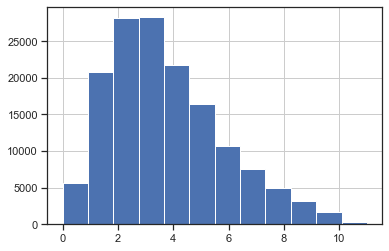

In [6]:
hist = data['Price_Level_eq'].hist(bins=12)

In [7]:
data['Price_Level_eq'].describe()

count    149697.000000
mean          3.592657
std           2.247078
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          11.000000
Name: Price_Level_eq, dtype: float64

In [8]:
data = data.sort_values('price')
median = data['price'].median()
print(median)

46841.0


Based on this, we could label the unit price based on gaussian distribution. 

(array([3.39341349e-06, 1.31491217e-05, 1.83679527e-05, 1.96756827e-05,
        1.56977374e-05, 1.21528576e-05, 8.53188916e-06, 6.00816232e-06,
        4.04407848e-06, 2.80532612e-06, 1.69101787e-06, 9.33686487e-07]),
 array([ 10000.,  19394.,  28788.,  38182.,  47576.,  56970.,  66364.,
         75758.,  85152.,  94546., 103940., 113334., 122728.]),
 <a list of 12 Patch objects>)

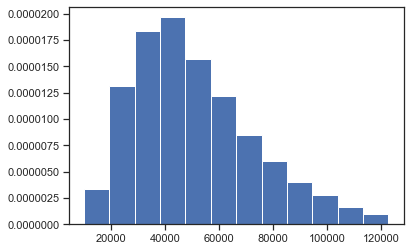

In [9]:
plt.hist(data['price'], density=True, bins=12)

In [10]:
percentile_list = []
for i in range(1,12):
    num = data['price'].quantile(i/12)
    percentile_list.append(num)
print(percentile_list)

[23932.0, 29434.33333333333, 34153.0, 38459.0, 42474.0, 46841.0, 51727.33333333334, 57440.333333333314, 64148.0, 72858.66666666669, 86364.33333333331]


In [11]:
data['Price_Level_area'] = data['price']
def set_price_level_area(row):
    if row["Price_Level_area"] < percentile_list[0]:
        return 0
    elif row["Price_Level_area"] < percentile_list[1]:
        return 1
    elif row["Price_Level_area"] < percentile_list[2]:
        return 2
    elif row["Price_Level_area"] < percentile_list[3]:
        return 3
    elif row["Price_Level_area"] < percentile_list[4]:
        return 4    
    elif row["Price_Level_area"] < percentile_list[5]:
        return 5
    elif row["Price_Level_area"] < percentile_list[6]:
        return 6
    elif row["Price_Level_area"] < percentile_list[7]:
        return 7
    elif row["Price_Level_area"] < percentile_list[8]:
        return 8
    elif row["Price_Level_area"] < percentile_list[9]:
        return 9   
    elif row["Price_Level_area"] < percentile_list[10]:
        return 10
    else:
        return 11
data = data.assign(Price_Level_area = data.apply(set_price_level_area,axis = 1))
data.head(5)

,Unnamed: 0,Lng,Lat,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,...,elevator,fiveYearsProperty,subway,district,communityAverage,Years,Months,AnomalyScore,Price_Level_eq,Price_Level_area
88492,88492,116.363306,40.080230,1,0,97.7,10000,97.69,2,1,...,0,0,1,6,41355,12,10,-3,0,0
88487,88487,116.363486,40.077967,1,0,97.0,10030,96.71,2,1,...,0,0,1,6,42044,12,10,-3,0,0
97688,97688,116.603404,40.053611,1,0,85.0,10035,84.71,3,1,...,0,1,0,7,34170,13,5,-3,0,0
88543,88543,116.349009,40.074638,1,0,80.0,10048,79.62,2,2,...,0,0,1,6,47958,12,11,-3,0,0
138097,138097,116.661657,40.183940,1,0,101.0,10083,100.17,2,1,...,0,0,0,13,29442,12,4,-3,0,0


from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(data['Price_Level_eq']).reshape(-1,1))
yy = enc.transform(np.array(data['Price_Level_eq']).reshape(-1,1))
print(yy.shape)

In [12]:
data['Price_Level_area'].describe()

count    149697.000000
mean          5.500057
std           3.452061
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          11.000000
Name: Price_Level_area, dtype: float64

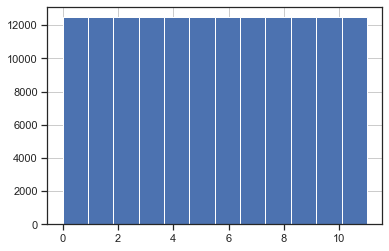

In [13]:
hist = data['Price_Level_area'].hist(bins=12)

In [14]:
#Delete total price, price, unit price
data = data.drop(columns=['totalPrice', 'price','square'])
print(data.shape)

(149697, 24)


# Determine the correlation
    1.pearson
    2.kendall
    3.spearman

In [15]:
pearsoncorr = data.corr(method='pearson')
pearsoncorr

,Unnamed: 0,Lng,Lat,DOM,followers,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,...,elevator,fiveYearsProperty,subway,district,communityAverage,Years,Months,AnomalyScore,Price_Level_eq,Price_Level_area
Unnamed: 0,1.000000,0.011559,-0.075297,-0.494316,-0.240451,-0.011139,0.016012,-0.004436,-0.026695,0.000697,...,-0.020809,0.180260,-0.003671,0.080325,0.082035,-0.457083,-0.165803,0.003889,-0.294220,-0.314928
Lng,0.011559,1.000000,0.046118,-0.012309,0.005304,-0.011996,0.063318,0.115473,0.058549,-0.012415,...,0.044320,0.049802,0.015859,0.201029,-0.121529,-0.012416,-0.012470,-0.008482,-0.103919,-0.092333
Lat,-0.075297,0.046118,1.000000,0.023937,-0.000184,0.072156,0.039277,-0.012172,0.076557,0.097776,...,-0.103196,0.026228,-0.092266,0.319991,-0.060905,0.017105,0.014620,-0.012458,-0.039355,-0.044382
DOM,-0.494316,-0.012309,0.023937,1.000000,0.466349,0.055279,0.006950,0.011424,0.061365,-0.014971,...,0.031202,-0.049364,0.012036,-0.003328,0.020113,0.335227,0.107183,-0.082669,0.219240,0.233818
followers,-0.240451,0.005304,-0.000184,0.466349,1.000000,-0.016879,-0.055904,0.023101,-0.043672,0.011824,...,-0.028385,0.067643,0.026258,-0.032017,-0.019898,0.332902,0.072629,-0.295543,0.183466,0.209083
livingRoom,-0.011139,-0.011996,0.072156,0.055279,-0.016879,1.000000,0.476375,0.084365,0.544145,0.120456,...,-0.061822,0.042096,-0.060364,0.024886,-0.039115,0.005688,-0.004960,-0.006259,-0.077218,-0.084709
drawingRoom,0.016012,0.063318,0.039277,0.006950,-0.055904,0.476375,1.000000,0.112491,0.508955,0.080939,...,0.040594,0.029089,-0.091090,0.016472,-0.072568,-0.062550,-0.012193,0.004834,-0.114950,-0.117583
kitchen,-0.004436,0.115473,-0.012172,0.011424,0.023101,0.084365,0.112491,1.000000,0.094184,0.004505,...,-0.003191,0.068232,0.041642,-0.078044,0.059732,0.103085,0.005460,0.046187,0.071482,0.079559
bathRoom,-0.026695,0.058549,0.076557,0.061365,-0.043672,0.544145,0.508955,0.094184,1.000000,0.026827,...,0.134662,-0.011520,-0.060828,0.004889,-0.049029,-0.000017,-0.003162,0.002338,-0.081511,-0.083411
buildingType,0.000697,-0.012415,0.097776,-0.014971,0.011824,0.120456,0.080939,0.004505,0.026827,1.000000,...,-0.621469,-0.009619,-0.154812,0.060084,-0.096241,0.005430,0.001092,-0.037682,-0.057832,-0.075830


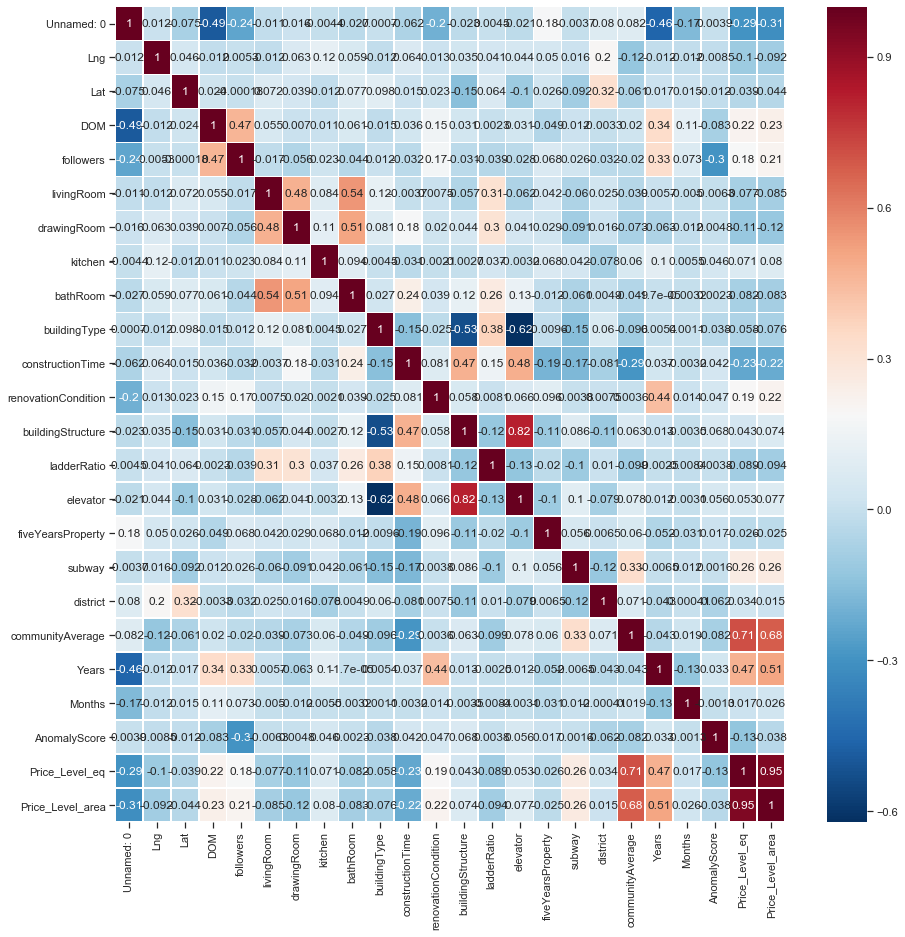

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)


In [17]:
kendallcorr = data.corr(method ='kendall') 
kendallcorr

,Unnamed: 0,Lng,Lat,DOM,followers,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,...,elevator,fiveYearsProperty,subway,district,communityAverage,Years,Months,AnomalyScore,Price_Level_eq,Price_Level_area
Unnamed: 0,1.000000,-0.016384,-0.053922,-0.588083,-0.253999,-0.004854,0.012685,-0.003795,-0.018956,0.000694,...,-0.016991,0.147182,-0.002998,0.086037,0.044327,-0.279009,-0.062208,0.009903,-0.214846,-0.211239
Lng,-0.016384,1.000000,-0.005316,-0.005663,0.000212,-0.017701,0.047092,0.066105,0.048738,-0.037233,...,0.055315,0.037285,0.023668,0.074040,-0.080850,-0.008715,-0.008840,0.001905,-0.063874,-0.062049
Lat,-0.053922,-0.005316,1.000000,0.016811,0.014423,0.067429,0.038125,-0.011977,0.066451,0.087319,...,-0.087005,0.024332,-0.053141,0.101697,-0.005579,0.009818,0.010482,-0.013598,0.004069,0.004179
DOM,-0.588083,-0.005663,0.016811,1.000000,0.458896,0.016012,-0.028040,0.032953,0.018816,-0.006396,...,0.020583,-0.109228,0.002267,-0.021725,-0.005206,0.545510,0.119826,-0.060907,0.336505,0.332542
followers,-0.253999,0.000212,0.014423,0.458896,1.000000,0.000402,-0.047275,0.054256,-0.036912,0.005913,...,-0.018716,0.084067,0.026295,-0.024813,0.015413,0.425057,0.060522,-0.051864,0.242682,0.240289
livingRoom,-0.004854,-0.017701,0.067429,0.016012,0.000402,1.000000,0.435605,0.075746,0.472740,0.123917,...,-0.067734,0.048088,-0.056609,-0.002599,-0.049103,-0.001506,-0.003845,-0.000943,-0.065874,-0.065166
drawingRoom,0.012685,0.047092,0.038125,-0.028040,-0.047275,0.435605,1.000000,0.102929,0.506237,0.063271,...,0.052342,0.025542,-0.088327,-0.011392,-0.063513,-0.063851,-0.011290,0.009507,-0.102876,-0.100908
kitchen,-0.003795,0.066105,-0.011977,0.032953,0.054256,0.075746,0.102929,1.000000,0.081378,0.005221,...,-0.003616,0.069088,0.041645,-0.057946,0.059315,0.055951,0.003769,0.044911,0.069180,0.068190
bathRoom,-0.018956,0.048738,0.066451,0.018816,-0.036912,0.472740,0.506237,0.081378,1.000000,0.012133,...,0.139082,-0.006245,-0.060005,-0.030841,-0.050448,-0.008020,-0.003792,0.005682,-0.077897,-0.076534
buildingType,0.000694,-0.037233,0.087319,-0.006396,0.005913,0.123917,0.063271,0.005221,0.012133,1.000000,...,-0.662586,0.003990,-0.146186,0.015472,-0.124565,0.009099,0.000980,-0.037940,-0.066856,-0.067154


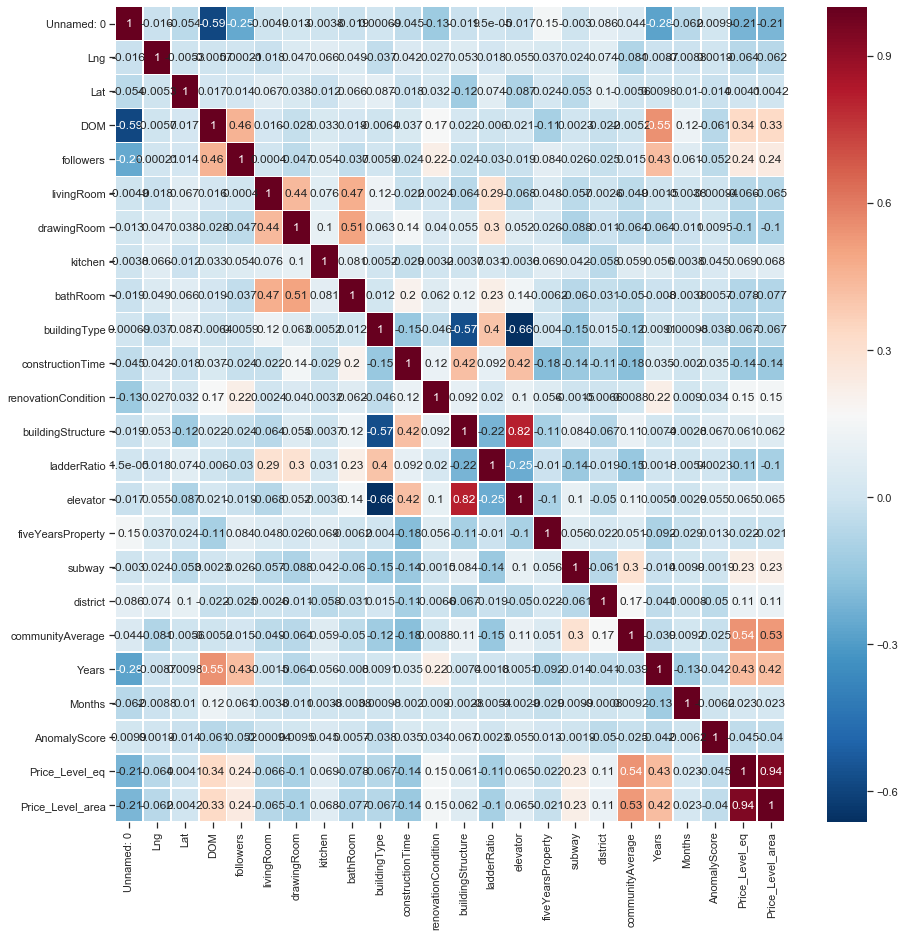

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(kendallcorr, 
            xticklabels=kendallcorr.columns,
            yticklabels=kendallcorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [19]:
spearmancorr = data.corr(method ='spearman') 
spearmancorr

,Unnamed: 0,Lng,Lat,DOM,followers,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,...,elevator,fiveYearsProperty,subway,district,communityAverage,Years,Months,AnomalyScore,Price_Level_eq,Price_Level_area
Unnamed: 0,1.000000,-0.018621,-0.077686,-0.793449,-0.393502,-0.006407,0.015482,-0.004639,-0.023362,0.000877,...,-0.020809,0.180260,-0.003671,0.117234,0.062899,-0.465300,-0.149393,0.012225,-0.313076,-0.314928
Lng,-0.018621,1.000000,0.009278,-0.007805,0.000191,-0.023039,0.059129,0.081001,0.060028,-0.048927,...,0.067718,0.045646,0.028976,0.091142,-0.094628,-0.011593,-0.012692,0.002330,-0.084387,-0.083659
Lat,-0.077686,0.009278,1.000000,0.024150,0.021455,0.087238,0.047293,-0.014667,0.081940,0.112913,...,-0.106516,0.029788,-0.065057,0.229704,-0.019189,0.012973,0.015062,-0.016725,0.002712,0.002552
DOM,-0.793449,-0.007805,0.024150,1.000000,0.608678,0.019513,-0.033025,0.038009,0.021823,-0.007701,...,0.023722,-0.125886,0.002613,-0.029162,-0.007618,0.681230,0.163369,-0.070444,0.444462,0.448519
followers,-0.393502,0.000191,0.021455,0.608678,1.000000,0.000567,-0.058243,0.065336,-0.044642,0.007462,...,-0.022510,0.101111,0.031626,-0.034182,0.022794,0.516318,0.083216,-0.062148,0.329785,0.333643
livingRoom,-0.006407,-0.023039,0.087238,0.019513,0.000567,1.000000,0.463952,0.080310,0.500851,0.137739,...,-0.071807,0.050980,-0.060013,-0.003241,-0.063121,-0.001764,-0.004794,-0.001007,-0.080045,-0.080929
drawingRoom,0.015482,0.059129,0.047293,-0.033025,-0.058243,0.463952,1.000000,0.105491,0.520488,0.068572,...,0.053643,0.026177,-0.090523,-0.013237,-0.079843,-0.071517,-0.013651,0.009789,-0.121445,-0.121733
kitchen,-0.004639,0.081001,-0.014667,0.038009,0.065336,0.080310,0.105491,1.000000,0.081899,0.005482,...,-0.003620,0.069158,0.041688,-0.066222,0.072663,0.060955,0.004428,0.045167,0.079728,0.080310
bathRoom,-0.023362,0.060028,0.081940,0.021823,-0.044642,0.500851,0.520488,0.081899,1.000000,0.012780,...,0.139927,-0.006283,-0.060369,-0.035560,-0.062092,-0.008793,-0.004482,0.005743,-0.090176,-0.090546
buildingType,0.000877,-0.048927,0.112913,-0.007701,0.007462,0.137739,0.068572,0.005482,0.012780,1.000000,...,-0.694930,0.004185,-0.153322,0.018683,-0.159042,0.010387,0.001209,-0.039984,-0.080820,-0.082965


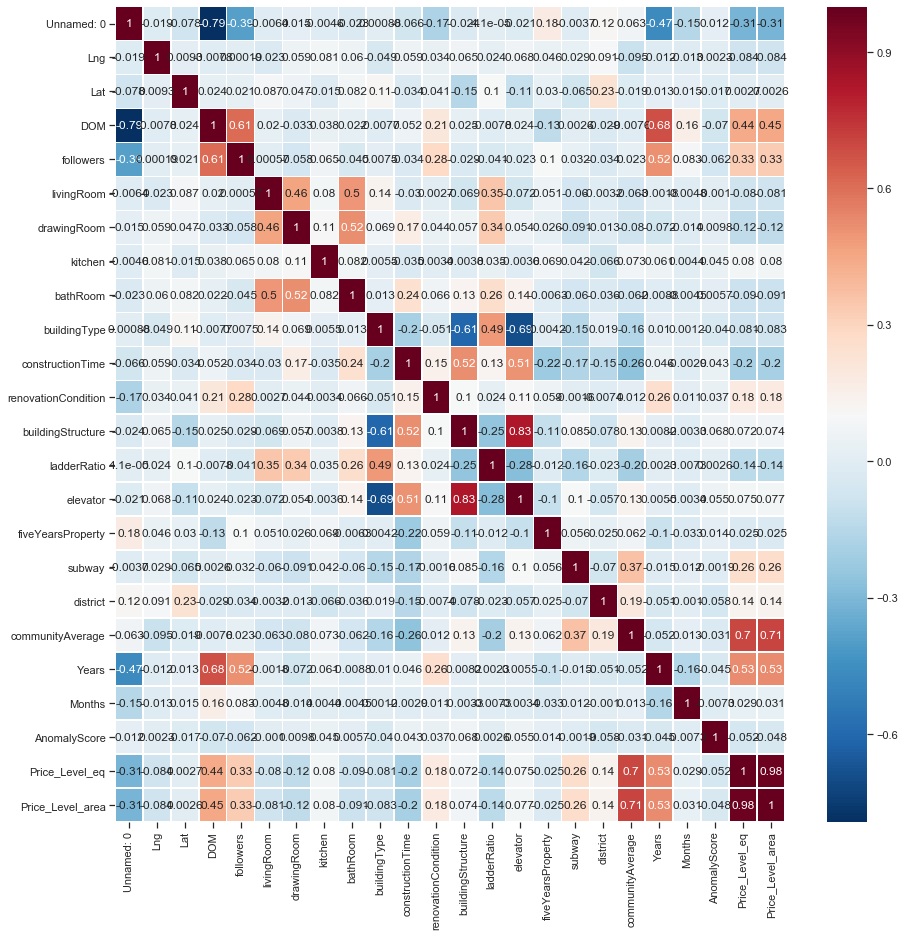

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(spearmancorr, 
            xticklabels=spearmancorr.columns,
            yticklabels=spearmancorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

# From features above, 7 features are selected:
    1.community average
    2.followers
    3.Construction Time 
    4.subway
    5.district
    6.DOM
    7.Renovation Condition
    

# Visualize the dataset using equally spaced label and equally area label

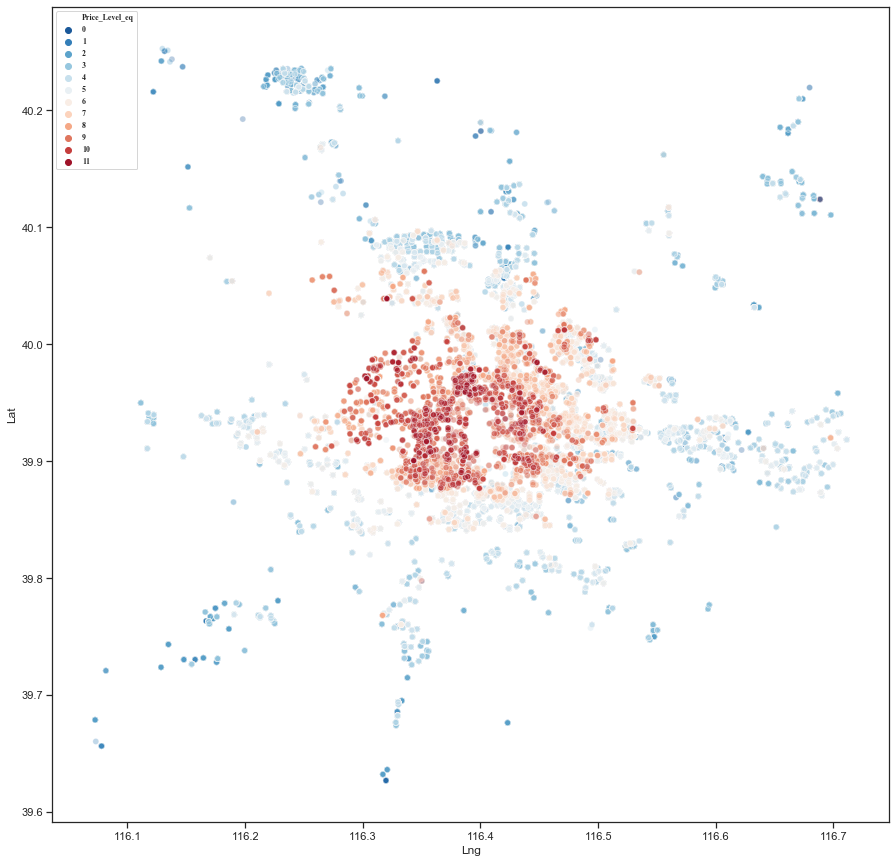

In [21]:
plt.figure(figsize=(15,15))
sns.scatterplot(x="Lng", y="Lat", hue="Price_Level_eq", palette=sns.color_palette("RdBu_r",n_colors=12), data=data, legend="brief", alpha=0.3)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

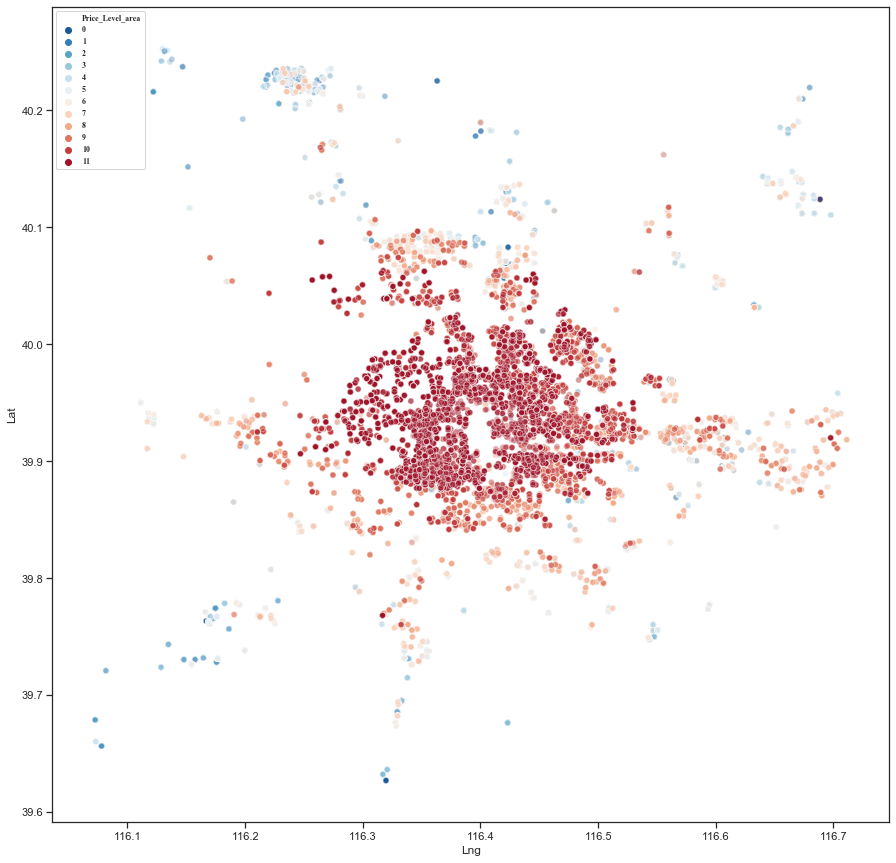

In [22]:
plt.figure(figsize=(15,15))
sns.scatterplot(x="Lng", y="Lat", hue="Price_Level_area", palette=sns.color_palette("RdBu_r", n_colors=12), data=data, legend="brief", alpha=0.3)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

feature = []
for i in range(0,18):
    feature.append(data.columns[i])
print(feature)

In [23]:
from sklearn.preprocessing import scale
#Community Average, subway, DOM, construction time, renovation condition, followers, drawing room
#feature
data["communityAverage"].astype(float)
features = ["communityAverage","constructionTime", "subway","followers","district","DOM","renovationCondition"]
#data_Y = scale(data["Price_Level_eq"])

In [24]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_squared_error
#raw_data = np.array(data[['communityAverage','constructionTime', 'subway','followers','district','DOM','renovationCondition']])
raw_data = data[features]
for feature in features:
    raw_data[feature] = minmax_scale(raw_data[feature])
Y = data["Price_Level_eq"]


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(raw_data, Y, test_size=0.2, random_state=27)
dataplot = X_test.copy()

In [27]:
sum_0=0;
sum_1=0;
sum_2=0;
sum_3=0;
sum_4=0;
sum_5=0;
sum_6=0;
sum_7=0;
sum_8=0;
sum_9=0;
sum_10=0;
sum_11=0;
label_0=[]
label_1=[]
label_2=[]
label_3=[]
label_4=[]
label_5=[]
label_6=[]
label_7=[]
label_8=[]
label_9=[]
label_10=[]
label_11=[]

# Visualize the train_set and test_set

In [28]:
for i in range(0,Y_test.index.shape[0]):
    if Y_test[Y_test.index[i]] == 0:
        sum_0 = sum_0 + 1
        label_0.append(Y_test.index[i])
    elif Y_test[Y_test.index[i]] == 1:
        sum_1 = sum_1 + 1
        label_1.append(Y_test.index[i])
    elif Y_test[Y_test.index[i]] == 2:
        sum_2 = sum_2 + 1
        label_2.append(Y_test.index[i])
    elif Y_test[Y_test.index[i]] == 3:
        sum_3 = sum_3 + 1
        label_3.append(Y_test.index[i])
    elif Y_test[Y_test.index[i]] == 4:
        sum_4 = sum_4 + 1
        label_4.append(Y_test.index[i])
    elif Y_test[Y_test.index[i]] == 5:
        sum_5 = sum_5 + 1
        label_5.append(Y_test.index[i])
    elif Y_test[Y_test.index[i]] == 6:
        sum_6 = sum_6 + 1
        label_6.append(Y_test.index[i])
    elif Y_test[Y_test.index[i]] == 7:
        sum_7 = sum_7 + 1
        label_7.append(Y_test.index[i])
    elif Y_test[Y_test.index[i]] == 8:
        sum_8 = sum_8 + 1
        label_8.append(Y_test.index[i])
    elif Y_test[Y_test.index[i]] == 9:
        sum_9 = sum_9 + 1
        label_9.append(Y_test.index[i])
    elif Y_test[Y_test.index[i]] == 10:
        sum_10 = sum_10 + 1
        label_10.append(Y_test.index[i])
    else:
        sum_11 = sum_11 +1
        label_11.append(Y_test.index[i])
print("label 0 count:" + str(sum_0))
print("label 1 count:" + str(sum_1))
print("label 2 count:" + str(sum_2))
print("label 3 count:" + str(sum_3))
print("label 4 count:" + str(sum_4))
print("label 5 count:" + str(sum_5))
print("label 6 count:" + str(sum_6))
print("label 7 count:" + str(sum_7))
print("label 8 count:" + str(sum_8))
print("label 9 count:" + str(sum_9))
print("label 10 count:" + str(sum_10))
print("label 11 count:" + str(sum_11))

label 0 count:1091
label 1 count:4197
label 2 count:5711
label 3 count:5629
label 4 count:4298
label 5 count:3337
label 6 count:2161
label 7 count:1510
label 8 count:974
label 9 count:635
label 10 count:340
label 11 count:57


# Classification
    1. Random Forest Classifier
    2. Gradient Boosting Classifier
    3. Decision Tree Classifier
    4. KNeighbors Classifier
    5. SVC
    6. MLP Classifier
    

From the image above, it's pretty obvious that using same area doesn't really help, compaing with the real time data on Lianjia's website, so start here, we'll use the equally spaced divided data to do the classification.

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)
predict = clf.predict(X_test)
print(feature)
print(clf.feature_importances_)
print('train score: ' + str(clf.score(X_train, Y_train)))
print('test score: ' + str(clf.score(X_test, Y_test)))

renovationCondition
[0.32449109 0.15350597 0.0141426  0.20798894 0.05462892 0.20308147
 0.04216102]
train score: 0.9588333041074844
test score: 0.437875751503006


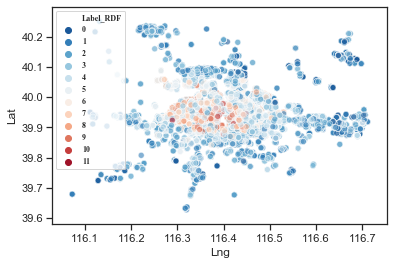

In [30]:
dataplot["Label_RDF"] = predict
dataplot["Lng"] = data["Lng"]
dataplot["Lat"] = data["Lat"]
sns.scatterplot(x="Lng", y="Lat", hue="Label_RDF", palette=sns.color_palette("RdBu_r", n_colors=12), data=dataplot, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=160, learning_rate=0.15, max_depth=6)
clf.fit(X_train, Y_train)
predict = clf.predict(X_test)
print(feature)
print(clf.feature_importances_)
print('train score: ' + str(clf.score(X_train, Y_train)))
print('test score: ' + str(clf.score(X_test, Y_test)))

renovationCondition
[0.50805558 0.04689181 0.00461653 0.10614271 0.0239548  0.27766013
 0.03267843]
train score: 0.6269445627395476
test score: 0.46132264529058115


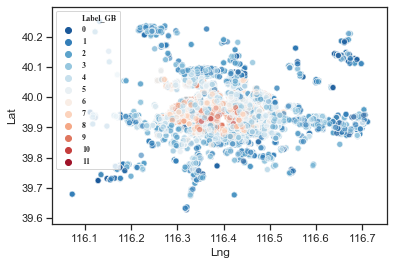

In [32]:
dataplot["Label_GB"] = predict
sns.scatterplot(x="Lng", y="Lat", hue="Label_GB", palette=sns.color_palette("RdBu_r", n_colors=12), data=dataplot, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

In [33]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
predict = clf.predict(X_test)
print(feature)
print(clf.feature_importances_)
print('train score: ' + str(clf.score(X_train, Y_train)))
print('test score: ' + str(clf.score(X_test, Y_test)))

renovationCondition
[0.30343432 0.14520639 0.02268485 0.20632815 0.04574503 0.2163625
 0.06023876]
train score: 0.9588416543500589
test score: 0.38336673346693384


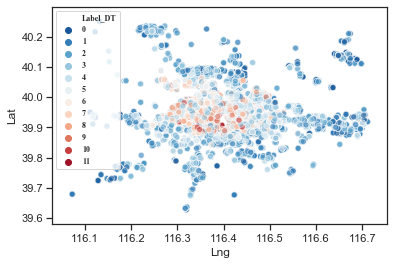

In [34]:
dataplot["Label_DT"] = predict
sns.scatterplot(x="Lng", y="Lat", hue="Label_DT", palette=sns.color_palette("RdBu_r", n_colors=12), data=dataplot, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

In [35]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=45, weights='distance')
clf.fit(X_train, Y_train)
predict = clf.predict(X_test)
print('train score: ' + str(clf.score(X_train, Y_train)))
print('test score: ' + str(clf.score(X_test, Y_test)))

train score: 0.9588416543500589
test score: 0.36633266533066133


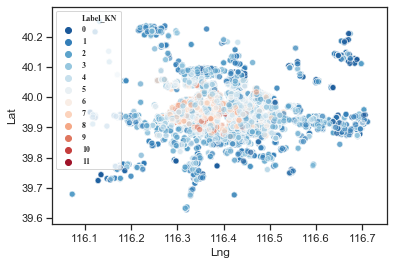

In [36]:
dataplot["Label_KN"] = predict
sns.scatterplot(x="Lng", y="Lat", hue="Label_KN", palette=sns.color_palette("RdBu_r", n_colors=12), data=dataplot, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

In [37]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, Y_train)
predict = clf.predict(X_test)
print('train score: ' + str(clf.score(X_train, Y_train)))
print('test score: ' + str(clf.score(X_test, Y_test)))

train score: 0.29050493916848286
test score: 0.291750167000668


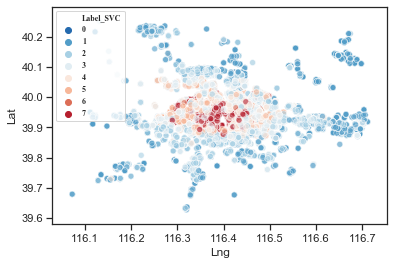

In [43]:
dataplot["Label_SVC"] = predict
sns.scatterplot(x="Lng", y="Lat", hue="Label_SVC", palette=sns.color_palette("RdBu_r", n_colors=8), data=dataplot, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

In [44]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
#clf = MLPClassifier(learning_rate='adaptive', learning_rate_init=0.01, early_stopping=True)
clf = MLPClassifier(solver='adam', alpha=1e-5,activation='relu', hidden_layer_sizes=(163,),learning_rate='adaptive', learning_rate_init=0.01,random_state=27, early_stopping=True,max_iter=50000,verbose=False,warm_start=True)
clf.fit(X_train, Y_train)
predict = clf.predict(X_test)
predict_train = clf.predict(X_train)
test_score = accuracy_score(Y_test, predict)
train_score = accuracy_score(Y_train, predict_train)
print(train_score)
print(test_score)


0.4387968970498593
0.43246492985971946


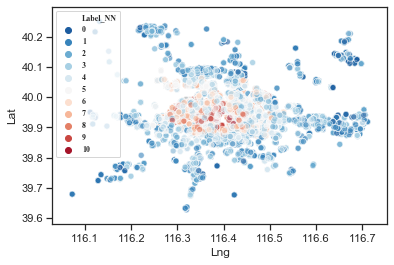

In [46]:
dataplot["Label_NN"] = predict
sns.scatterplot(x="Lng", y="Lat", hue="Label_NN", palette=sns.color_palette("RdBu_r", n_colors=11), data=dataplot, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

In [47]:
dataplot["Ground_Truth"] = Y_test
dataplot.head(5)

,communityAverage,constructionTime,subway,followers,district,DOM,renovationCondition,Label_RDF,Lng,Lat,Label_GB,Label_DT,Label_KN,Label_SVC,Label_NN,Ground_Truth
60776,0.426072,0.803030,1.0,0.012903,0.500000,0.006563,1.000000,7,116.485379,40.009067,7,9,4,5,7,7
94573,0.346370,0.696970,1.0,0.000000,0.500000,0.000000,0.000000,2,116.437967,40.001107,1,2,2,2,2,1
6133,0.201962,0.848485,1.0,0.014747,1.000000,0.031026,0.000000,4,116.560389,40.094933,2,2,0,1,3,2
128817,0.706170,0.818182,0.0,0.000000,0.583333,0.000000,0.000000,3,116.303301,39.970700,6,3,3,7,5,4
26519,0.278156,0.651515,1.0,0.012903,0.083333,0.007757,0.666667,5,116.382479,39.856115,4,4,2,2,5,3


In [48]:
Result = dataplot.drop(columns=['communityAverage', 'constructionTime','district','subway','followers','DOM','renovationCondition'])
Result.head(5)

,Label_RDF,Lng,Lat,Label_GB,Label_DT,Label_KN,Label_SVC,Label_NN,Ground_Truth
60776,7,116.485379,40.009067,7,9,4,5,7,7
94573,2,116.437967,40.001107,1,2,2,2,2,1
6133,4,116.560389,40.094933,2,2,0,1,3,2
128817,3,116.303301,39.970700,6,3,3,7,5,4
26519,5,116.382479,39.856115,4,4,2,2,5,3


# Visualize result

# Compare result with ground truth

In [49]:
Result['Label_RDF_Predict'] = Result['Label_RDF']
def Label_RDF_Predict (row):
   if row['Label_RDF'] == row['Ground_Truth'] :
      return 1
   else:
      return 0
Result.apply(lambda row: Label_RDF_Predict(row), axis=1)
Result = Result.assign(Label_RDF_Predict = Result.apply(Label_RDF_Predict,axis = 1))

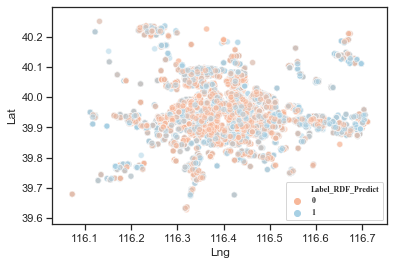

In [50]:
sns.scatterplot(x="Lng", y="Lat", hue="Label_RDF_Predict", palette=sns.color_palette("RdBu", n_colors=2), data=Result, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.savefig('RDF.png', dpi=600)

In [51]:
Result['Label_GB_Predict'] = Result['Label_GB']
def Label_GB_Predict (row):
   if row['Label_GB'] == row['Ground_Truth'] :
      return 1
   else:
      return 0
Result.apply(lambda row: Label_GB_Predict(row), axis=1)
Result = Result.assign(Label_GB_Predict = Result.apply(Label_GB_Predict,axis = 1))

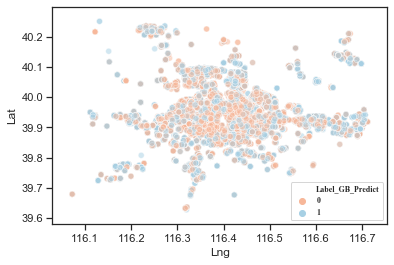

In [52]:
sns.scatterplot(x="Lng", y="Lat", hue="Label_GB_Predict", palette=sns.color_palette("RdBu", n_colors=2), data=Result, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.savefig('GB.png', dpi=600)

In [53]:
Result['Label_DT_Predict'] = Result['Label_DT']
def Label_DT_Predict (row):
   if row['Label_DT'] == row['Ground_Truth'] :
      return 1
   else:
      return 0
Result.apply(lambda row: Label_DT_Predict(row), axis=1)
Result = Result.assign(Label_DT_Predict = Result.apply(Label_DT_Predict,axis = 1))

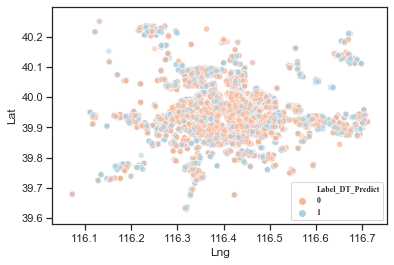

In [54]:
sns.scatterplot(x="Lng", y="Lat", hue="Label_DT_Predict", palette=sns.color_palette("RdBu", n_colors=2), data=Result, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.savefig('DT.png', dpi=600)

In [55]:
Result['Label_SVC_Predict'] = Result['Label_SVC']
def Label_SVC_Predict (row):
   if row['Label_SVC'] == row['Ground_Truth'] :
      return 1
   else:
      return 0
Result.apply(lambda row: Label_SVC_Predict(row), axis=1)
Result = Result.assign(Label_SVC_Predict = Result.apply(Label_SVC_Predict,axis = 1))

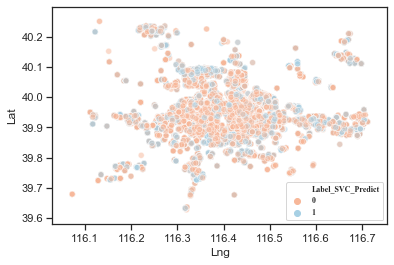

In [56]:
sns.scatterplot(x="Lng", y="Lat", hue="Label_SVC_Predict", palette=sns.color_palette("RdBu", n_colors=2), data=Result, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.savefig('SVC.png', dpi=600)

In [57]:
Result['Label_NN_Predict'] = Result['Label_NN']
def Label_NN_Predict (row):
   if row['Label_NN'] == row['Ground_Truth'] :
      return 1
   else:
      return 0
Result.apply(lambda row: Label_NN_Predict(row), axis=1)
Result = Result.assign(Label_NN_Predict = Result.apply(Label_NN_Predict,axis = 1))

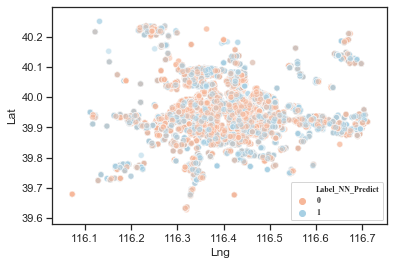

In [58]:
sns.scatterplot(x="Lng", y="Lat", hue="Label_NN_Predict", palette=sns.color_palette("RdBu", n_colors=2), data=Result, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.savefig('NN.png', dpi=600)

In [59]:
Result['Label_KN_Predict'] = Result['Label_KN']
def Label_KN_Predict (row):
   if row['Label_KN'] == row['Ground_Truth'] :
      return 1
   else:
      return 0
Result.apply(lambda row: Label_KN_Predict(row), axis=1)
Result = Result.assign(Label_KN_Predict = Result.apply(Label_KN_Predict,axis = 1))

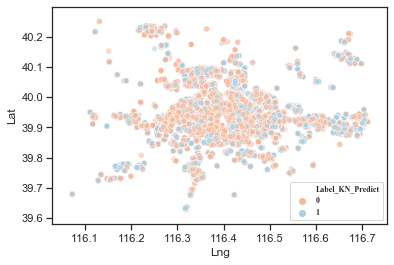

In [60]:
sns.scatterplot(x="Lng", y="Lat", hue="Label_KN_Predict", palette=sns.color_palette("RdBu", n_colors=2), data=Result, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.savefig('KN.png', dpi=600)

In [61]:
Result.loc[(Result['Label_GB_Predict'] == 0)].shape[0]

16128

In [62]:
print("Gradient Boosting classifier correct:" + str(Result.loc[(Result['Label_GB_Predict'] == 1)].shape[0]))
print("Neural Network classifier correct:" + str(Result.loc[(Result['Label_NN_Predict'] == 1)].shape[0]))
print("Random Forest Classifier correct:" + str(Result.loc[(Result['Label_RDF_Predict'] == 1)].shape[0]))
print("Decision Tree Classifier:" + str(Result.loc[(Result['Label_DT_Predict'] == 1)].shape[0]))
print("KNeighbors Classifier correct:" + str(Result.loc[(Result['Label_KN_Predict'] == 1)].shape[0]))
print("SVM classifier correct:" + str(Result.loc[(Result['Label_SVC_Predict'] == 1)].shape[0]))

Gradient Boosting classifier correct:13812
Neural Network classifier correct:12948
Random Forest Classifier correct:13110
Decision Tree Classifier:11478
KNeighbors Classifier correct:10968
SVM classifier correct:8735


# compare result with 1 fault tolerance

In [63]:
Result['Label_RDF_Predict_1'] = Result['Label_RDF']
def Label_RDF_Predict_1 (row):
   if abs(row['Label_RDF'] - row['Ground_Truth']) < 2 :
      return 1
   else:
      return 0
Result.apply(lambda row: Label_RDF_Predict_1(row), axis=1)
Result = Result.assign(Label_RDF_Predict_1 = Result.apply(Label_RDF_Predict_1,axis = 1))

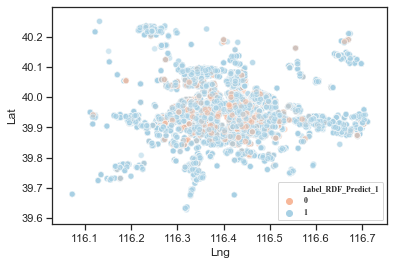

In [64]:
sns.scatterplot(x="Lng", y="Lat", hue="Label_RDF_Predict_1", palette=sns.color_palette("RdBu", n_colors=2), data=Result, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.savefig('RDF_1.png', dpi=600)

In [65]:
Result['Label_GB_Predict_1'] = Result['Label_GB']
def Label_GB_Predict_1 (row):
   if abs(row['Label_GB'] - row['Ground_Truth']) < 2 :
      return 1
   else:
      return 0
Result.apply(lambda row: Label_GB_Predict_1(row), axis=1)
Result = Result.assign(Label_GB_Predict_1 = Result.apply(Label_GB_Predict_1,axis = 1))

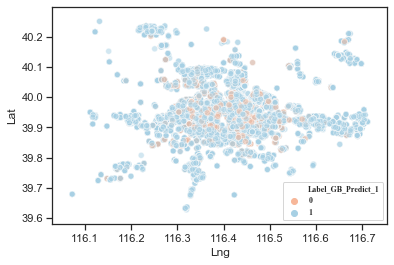

In [66]:
sns.scatterplot(x="Lng", y="Lat", hue="Label_GB_Predict_1", palette=sns.color_palette("RdBu", n_colors=2), data=Result, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.savefig('GB_1.png', dpi=600)

In [67]:
Result['Label_NN_Predict_1'] = Result['Label_NN']
def Label_NN_Predict_1 (row):
   if abs(row['Label_NN'] - row['Ground_Truth']) < 2 :
      return 1
   else:
      return 0
Result.apply(lambda row: Label_NN_Predict_1(row), axis=1)
Result = Result.assign(Label_NN_Predict_1 = Result.apply(Label_NN_Predict_1,axis = 1))

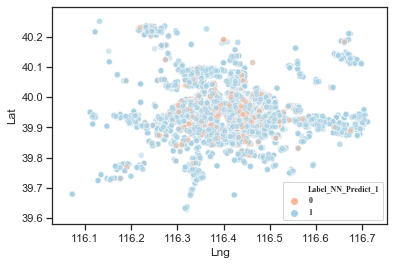

In [68]:
sns.scatterplot(x="Lng", y="Lat", hue="Label_NN_Predict_1", palette=sns.color_palette("RdBu", n_colors=2), data=Result, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.savefig('NN_1.png', dpi=600)

In [69]:
Result['Label_KN_Predict_1'] = Result['Label_KN']
def Label_KN_Predict_1 (row):
   if abs(row['Label_KN'] - row['Ground_Truth']) < 2 :
      return 1
   else:
      return 0
Result.apply(lambda row: Label_KN_Predict_1(row), axis=1)
Result = Result.assign(Label_KN_Predict_1 = Result.apply(Label_KN_Predict_1,axis = 1))

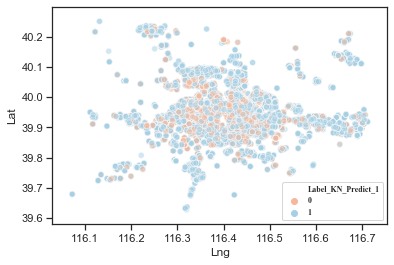

In [70]:
sns.scatterplot(x="Lng", y="Lat", hue="Label_KN_Predict_1", palette=sns.color_palette("RdBu", n_colors=2), data=Result, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.savefig('KN_1.png', dpi=600)

In [71]:
Result['Label_SVC_Predict_1'] = Result['Label_SVC']
def Label_SVC_Predict_1 (row):
   if abs(row['Label_SVC'] - row['Ground_Truth']) < 2 :
      return 1
   else:
      return 0
Result.apply(lambda row: Label_SVC_Predict_1(row), axis=1)
Result = Result.assign(Label_SVC_Predict_1 = Result.apply(Label_SVC_Predict_1,axis = 1))

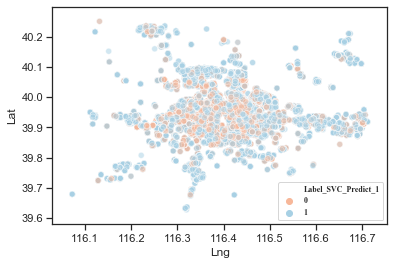

In [72]:
sns.scatterplot(x="Lng", y="Lat", hue="Label_SVC_Predict_1", palette=sns.color_palette("RdBu", n_colors=2), data=Result, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.savefig('SVC_1.png', dpi=600)

In [73]:
Result['Label_DT_Predict_1'] = Result['Label_DT']
def Label_DT_Predict_1 (row):
   if abs(row['Label_DT'] - row['Ground_Truth']) < 2 :
      return 1
   else:
      return 0
Result.apply(lambda row: Label_DT_Predict_1(row), axis=1)
Result = Result.assign(Label_DT_Predict_1 = Result.apply(Label_DT_Predict_1,axis = 1))

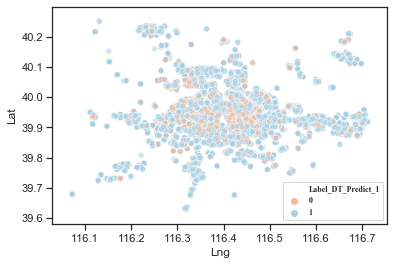

In [74]:
sns.scatterplot(x="Lng", y="Lat", hue="Label_DT_Predict_1", palette=sns.color_palette("RdBu", n_colors=2), data=Result, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.savefig('DT_1.png', dpi=600)

In [75]:
print("Gradient Boosting classifier correct:" + str(Result.loc[(Result['Label_GB_Predict_1'] == 1)].shape[0]))
print("Neural Network classifier correct:" + str(Result.loc[(Result['Label_NN_Predict_1'] == 1)].shape[0]))
print("Random Forest Classifier correct:" + str(Result.loc[(Result['Label_RDF_Predict_1'] == 1)].shape[0]))
print("Decision Tree Classifier:" + str(Result.loc[(Result['Label_DT_Predict_1'] == 1)].shape[0]))
print("KNeighbors Classifier correct:" + str(Result.loc[(Result['Label_KN_Predict_1'] == 1)].shape[0]))
print("SVM classifier correct:" + str(Result.loc[(Result['Label_SVC_Predict_1'] == 1)].shape[0]))

Gradient Boosting classifier correct:26036
Neural Network classifier correct:26151
Random Forest Classifier correct:25397
Decision Tree Classifier:23966
KNeighbors Classifier correct:22256
SVM classifier correct:20710


In [76]:
Y_test.shape[0]

29940

In [77]:
print("Gradient Boosting classifier accuracy:" + str(Result.loc[(Result['Label_GB_Predict_1'] == 1)].shape[0]/Y_test.shape[0]))
print("Neural Network classifier accuracy:" + str(Result.loc[(Result['Label_NN_Predict_1'] == 1)].shape[0]/Y_test.shape[0]))
print("Random Forest Classifier accuracy:" + str(Result.loc[(Result['Label_RDF_Predict_1'] == 1)].shape[0]/Y_test.shape[0]))
print("Decision Tree Classifier accuracy:" + str(Result.loc[(Result['Label_DT_Predict_1'] == 1)].shape[0]/Y_test.shape[0]))
print("KNeighbors Classifier accuracy:" + str(Result.loc[(Result['Label_KN_Predict_1'] == 1)].shape[0]/Y_test.shape[0]))
print("SVM classifier accuracy:" + str(Result.loc[(Result['Label_SVC_Predict_1'] == 1)].shape[0]/Y_test.shape[0]))

Gradient Boosting classifier accuracy:0.8696058784235137
Neural Network classifier accuracy:0.8734468937875751
Random Forest Classifier accuracy:0.8482631930527722
Decision Tree Classifier accuracy:0.8004676018704074
KNeighbors Classifier accuracy:0.7433533734134936
SVM classifier accuracy:0.6917167668670675


# Conclusion:
    Finally here comes the result:
        1. Gradient Boosting Classifier: 46.1%
        2. Random Forest Classifier:     43.8%
        3. Neural Network:               43.2%
        4. Decision Tree Classifier:     38.3%
        5. KNeighbors:                   36.6%
        6. SVM:                          29.2%
    Result with 1 fault tolerance:
        1. Neural Network:               87.3%
        2. Gradient Boosting Classifier: 87.0%
        3. Random Forest Classifier:     84.8%
        4. Decision Tree Classifier:     80.0%
        5. KNeighbors:                   74.3%
        6. SVM:                          68.2%